<a href="https://colab.research.google.com/github/tazwarmahmud/Predictive-model-for-diabetes-detection/blob/main/Predictive_model_to_identify_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






# Tazwar Mahmud	(25501166)












Loading the Dataset

In [ ]:
# Let's Load The Dataset
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/JackPrisa13/stds_ass2/main/diabetes_binary_health_indicators_BRFSS2015.csv')

# Move target label to the end
target_column = df.pop('Diabetes_binary')
df['Diabetes_binary'] = target_column

df.head()

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0           0.0     0.0      1.0  ...          0.0      5.0      18.0   
1           1.0     0.0      0.0  ...          1.0      3.0       0.0   
2           0.0     1.0      0.0  ...          1.0      5.0      30.0   
3           1.0     1.0      1.0  ...          0.0      2.0       0.0   
4           1.0     1.0      1.0  ...          0.0      2.0       3.0   

   PhysHlth  DiffWalk  Sex   Age  Education  Income  Diabetes_binary  
0      15.0       1.0  0.0   9.0        4.0     3.0              0.0  
1       0.0       0.0  0.0   7.0        6.0     1.0              0.0  
2      30.0       1.0  0.0   9.0        4.0     8.0              0.0  
3       0.0       0.0  0.0  11.0        3.0     6.0              0.0  
4       0.0       0.0  0.0  11.0        5.0     4.0              0.0  

[5 rows x 22 columns]

In [ ]:
# Find total number of Rows and Columns

rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 253680 
Number of Columns : 22


First observation is that, the dataset contains 253680 rows and 22 columns.

In [ ]:
CATEGORICAL_COLUMNS = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                       'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'GenHlth',
                       'Education', 'Income', 'Age']

CONTINUOUS_COLUMNS = ['BMI', 'PhysHlth', 'MentHlth']

TARGET_COLUMN = ['Diabetes_binary']


In [ ]:
# Find all Columns and their Type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  NoDocbcCost           253680 non-null  float64
 13  GenHlth               253680 non-null  float64
 14  MentHlth              253680 non-null  float64
 15  

Now, all columns have float64 data types. Here are the columns information:

**Diabetes_binary:** Represents the presence of diabetes (0 = no diabetes, 1 = pre-diabetes and diabetes).

**HighBP:** Indicates if the individual has high blood pressure (1 = yes, 0 = no).

**HighChol:** Indicates if the individual has high cholesterol (1 = yes, 0 = no).

**CholCheck:** Shows whether the individual has had a cholesterol check in the past five years (1 = yes, 0 = no).

**BMI:** Body Mass Index of the individual.

**Smoker:** Indicates if the individual is a smoker (1 = yes, 0 = no).

**Stroke:** Indicates if the individual has had a stroke (1 = yes, 0 = no).

**HeartDiseaseorAttack:** Shows whether the individual has had a heart disease or attack (1 = yes, 0 = no).

**PhysActivity:** Represents whether the individual engages in physical activity (1 = yes, 0 = no).

**Fruits:** Indicates if the individual consumes fruits regularly (1 = yes, 0 = no).

**Veggies:** Indicates if the individual consumes vegetables regularly (1 = yes, 0 = no).

**HvyAlcoholConsump:** Shows heavy alcohol consumption (1 = yes, 0 = no).

**AnyHealthcare:** Indicates if the individual has any form of healthcare coverage (1 = yes, 0 = no).

**NoDocbcCost:** Shows if the individual could not see a doctor due to cost in the past 12 months (1 = yes, 0 = no).

**GenHlth:** General health rating (ranging from 1 = excellent to 5 = poor).

**MentHlth:** Number of days in the past 30 days where the individual’s mental health was not good.

**PhysHlth:** Number of days in the past 30 days where the individual’s physical health was not good.

**DiffWalk:** Indicates if the individual has difficulty walking or climbing stairs (1 = yes, 0 = no).

**Sex:** Gender of the individual (1 = male, 0 = female).

**Age:** Age of the individual, divided into age categories.

**Education:** Education level of the individual (ranging from 1 = never attended school to 6 = college graduate).

**Income:** Income level of the individual (1 = less than \$10,000  to 8 = $75,000 or more).

In [ ]:
%pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 17.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=43a9c02dae3448bfc12fc47f2909d7f862d8d8988c72c7add69c66e9c8fdc9c5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Data Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(f'Number of Duplicated Values: {df.duplicated().sum()}')
print(f'Percentage of duplicated values: {df.duplicated().mean():.2%}')

#print(f'\nNulls:\n_____\n{df.isnull().sum()}')

Number of Duplicated Values: 24206
Percentage of duplicated values: 9.54%


In [ ]:
# Count the occurrences of 0 and 1 in 'Diabetes_binary' before dropping duplicates
original_counts = df['Diabetes_binary'].value_counts()

# Drop duplicates and count again
dropped_df = df.drop_duplicates()
dropped_counts = dropped_df['Diabetes_binary'].value_counts()

# Calculate the difference
affected_counts = original_counts - dropped_counts

# Print the results
print(f'Original Counts:\n{original_counts}')
print(f'\nCounts After Dropping Duplicates:\n{dropped_counts}')
print(f'\nAffected Counts (Original - Dropped):\n{affected_counts}')

print(f'\nShape of dropped_df: {dropped_df.shape}')

Original Counts:
Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

Counts After Dropping Duplicates:
Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

Affected Counts (Original - Dropped):
Diabetes_binary
0.0    23957
1.0      249
Name: count, dtype: int64

Shape of dropped_df: (229474, 22)


We will later compare the model results between dropping and not dropping the duplicate results.
- The class that is affected more by dropping the duplicates is 0 (Non-Diabetic), which is fine because our class of interests is 1 (Diabetic)

In [ ]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000              0.000000       0.000000   
25%         0.000000       0.000000              0.000000       1.000000   
50%         0.000000       0.000000              0.000000       1.000000   
75%         1.000000       0.000000              0.000000       1.000000   
max         1.000000       1.000000              1.000000       1.000000   

              Fruits        Veggies  HvyAlcoholConsump  AnyHealthcare  \
count  253680.000000  253680.000000      253680.000000  253680.000000   
mean        0.634256       0.811420           0.056197       0.951053   
std         0.481639       0.391175           0.230302       0.215759   
min         0.000000       0.000000           0.000000       0.000000   
25%         0.000000       1.000000           0.000000       1.000000   
50%         1.000000       1.000000           0.000000       1.000000   
75%         1.000000       1.000000           0.000000       1.000000   
max         1.000000       1.000000           1.000000       1.000000   

         NoDocbcCost        GenHlth       MentHlth       PhysHlth  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.084177       2.511392       3.184772       4.242081   
std         0.277654       1.068477       7.412847       8.717951   
min         0.000000       1.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       0.000000   
50%         0.000000       2.000000       0.000000       0.000000   
75%         0.000000       3.000000       2.000000       3.000000   
max         1.000000       5.000000      30.000000      30.000000   

            DiffWalk            Sex            Age      Education  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.168224       0.440342       8.032119       5.050434   
std         0.374066       0.496429       3.054220       0.985774   
min         0.000000       0.000000       1.000000       1.000000   
25%         0.000000       0.000000       6.000000       4.000000   
50%         0.000000       0.000000       8.000000       5.000000   
75%         0.000000       1.000000      10.000000       6.000000   
max         1.000000       1.000000      13.000000       6.000000   

              Income  Diabetes_binary  
count  253680.000000    253680.000000  
mean        6.053875         0.139333  
std         2.071148         0.346294  
min         1.000000         0.000000  
25%         5.000000         0.000000  
50%         7.000000         0.000000  
75%         8.000000         0.000000  
max         8.000000         1.000000

# Preprocessing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  NoDocbcCost           253680 non-null  float64
 13  GenHlth               253680 non-null  float64
 14  MentHlth              253680 non-null  float64
 15  

In [ ]:
# Create a dictionary to store unique value counts for each column
unique_values = {}

# Loop through each column in the DataFrame to count unique values
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

# Convert the dictionary to a DataFrame and display it in a transposed format
unique_value_counts_df = pd.DataFrame(unique_values, index=['unique value count']).transpose()

# Display the unique value counts
unique_value_counts_df

unique value count
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8
Diabetes_binary                        2

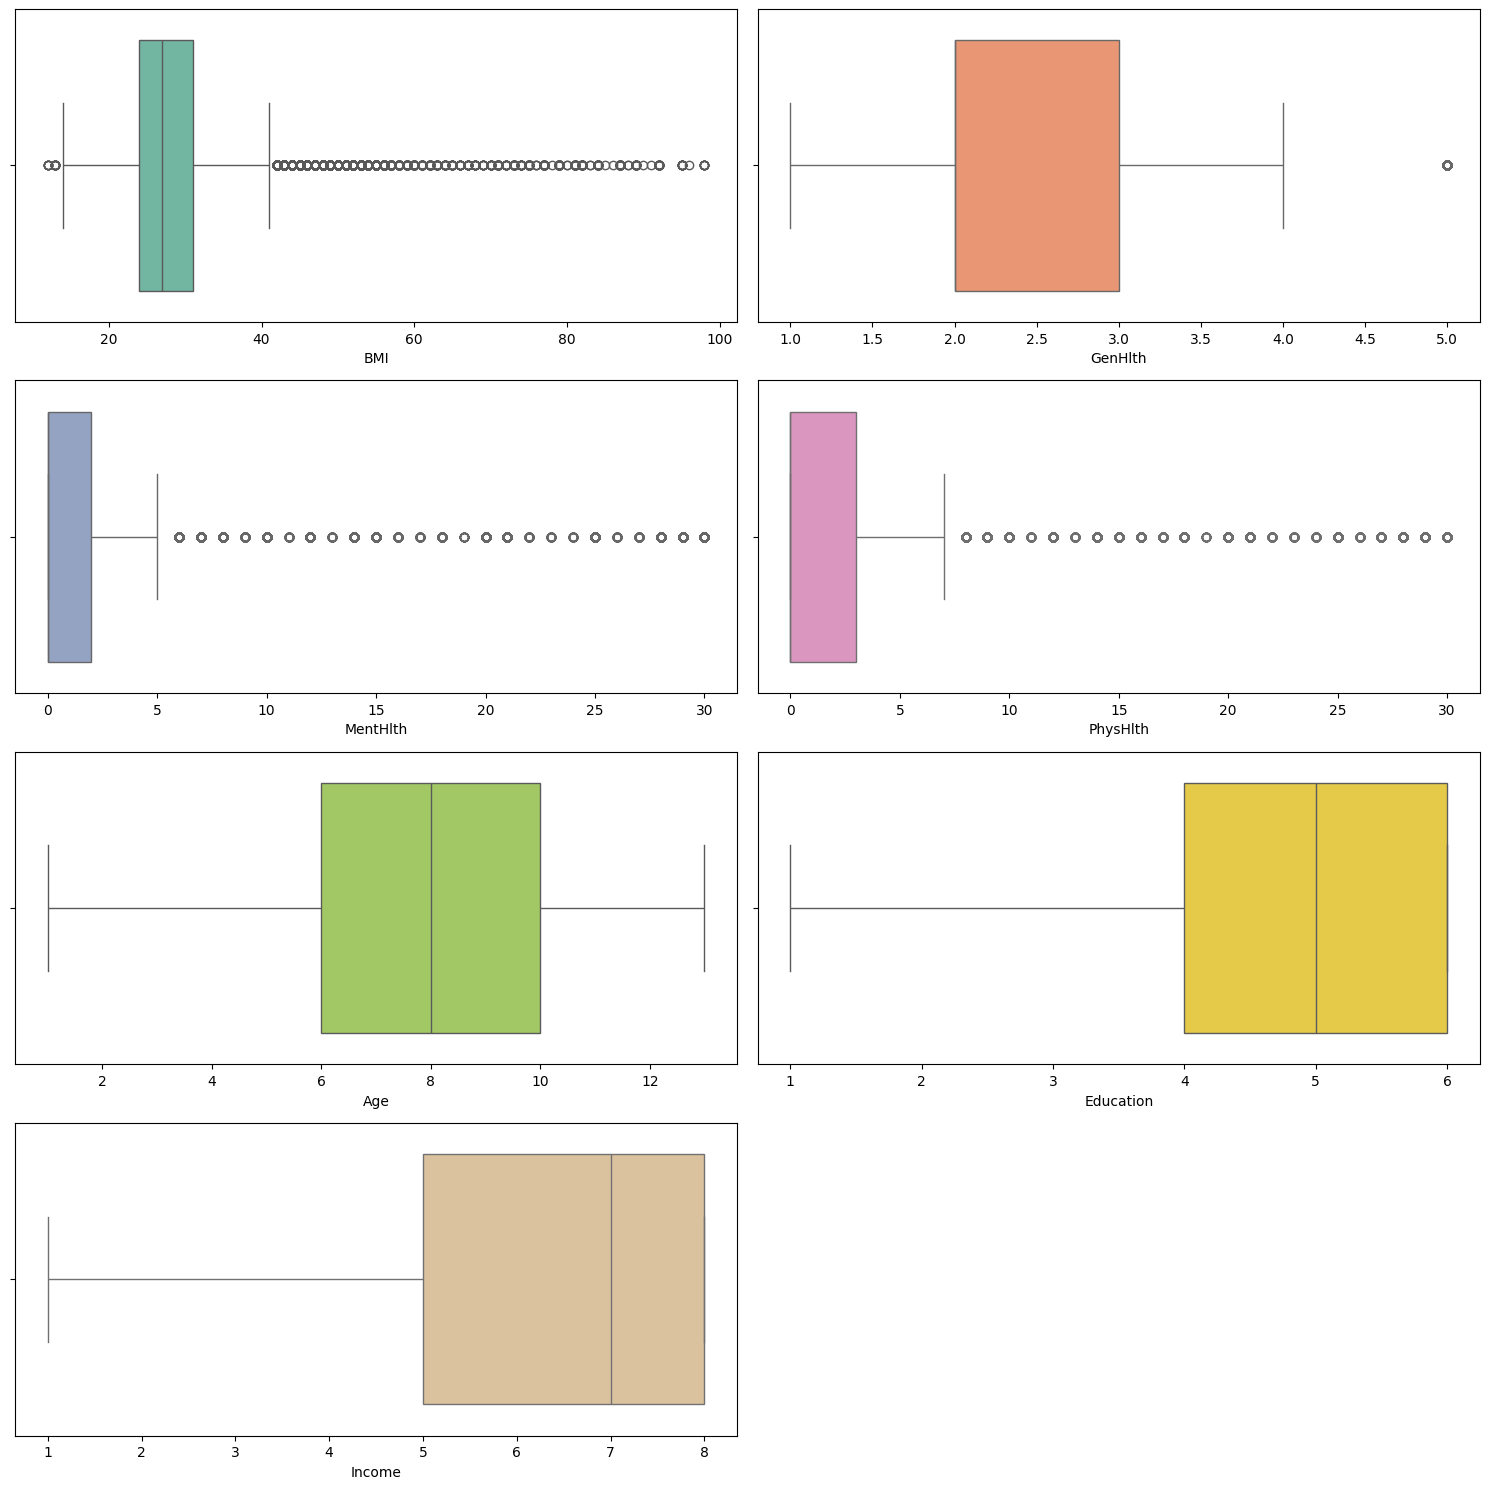

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))

# List of columns to create boxplots for
columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

colors = sns.color_palette('Set2', len(columns))

for i, col in enumerate(columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=col, data=df, color=colors[i])

# Display the plots
plt.tight_layout()
plt.show()

## Mapping Values for ease of Visualisations

In [ ]:
# Copy the initial dataset
df2 = df.copy()

# Replacing 0 with 'Non-Diabetic' and 1 with 'Diabetic' in a new column 'Diabetes_binary_str'
df2["Diabetes_binary"] = df2["Diabetes_binary"].replace({0: "Non-Diabetic", 1: "Diabetic"})

# Check if the new column was added and the values are correct
print(df2[["Diabetes_binary", "Diabetes_binary"]].head())

  Diabetes_binary Diabetes_binary
0    Non-Diabetic    Non-Diabetic
1    Non-Diabetic    Non-Diabetic
2    Non-Diabetic    Non-Diabetic
3    Non-Diabetic    Non-Diabetic
4    Non-Diabetic    Non-Diabetic


In [ ]:
# Mapping Age categories
df2['Age'] = df2['Age'].map({
    1: '18 to 24', 2: '25 to 29', 3: '30 to 34', 4: '35 to 39',
    5: '40 to 44', 6: '45 to 49', 7: '50 to 54', 8: '55 to 59',
    9: '60 to 64', 10: '65 to 69', 11: '70 to 74', 12: '75 to 79',
    13: '80 or older'
})

# Mapping HighBP categories
df2['HighBP'] = df2['HighBP'].map({
    0: 'No High', 1: 'High BP'
})

# Mapping HighChol categories
df2['HighChol'] = df2['HighChol'].map({
    0: 'No High Cholesterol', 1: 'High Cholesterol'
})

# Mapping CholCheck categories
df2['CholCheck'] = df2['CholCheck'].map({
    0: 'No Cholesterol Check in 5 Years', 1: 'Cholesterol Check in 5 Years'
})

# Mapping binary Yes/No categories for various columns
yes_no_columns = ['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
                  'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                  'NoDocbcCost', 'DiffWalk']

for col in yes_no_columns:
    df2[col] = df2[col].map({0: 'No', 1: 'Yes'})

# Mapping GenHlth categories
df2['GenHlth'] = df2['GenHlth'].map({
    5: 'Excellent', 4: 'Very Good', 3: 'Good', 2: 'Fair', 1: 'Poor'
})

# Mapping Sex categories
df2['Sex'] = df2['Sex'].map({
    0: 'Female', 1: 'Male'
})

# Mapping Education categories
df2['Education'] = df2['Education'].map({
    1: 'Never Attended School', 2: 'Elementary', 3: 'Junior High School',
    4: 'Senior High School', 5: 'Undergraduate Degree', 6: 'Master or Above'
})

# Mapping Income categories
df2['Income'] = df2['Income'].map({
    1: 'Less Than $10,000', 2: 'Less Than $10,000', 3: 'Less Than $10,000',
    4: 'Less Than $10,000', 5: 'Less Than $35,000', 6: 'Less Than $35,000',
    7: 'Less Than $35,000', 8: '$75,000 or More'
})

# Display the first few rows of the modified dataset
print(df2.head())

    HighBP             HighChol                        CholCheck   BMI Smoker  \
0  High BP     High Cholesterol     Cholesterol Check in 5 Years  40.0    Yes   
1  No High  No High Cholesterol  No Cholesterol Check in 5 Years  25.0    Yes   
2  High BP     High Cholesterol     Cholesterol Check in 5 Years  28.0     No   
3  High BP  No High Cholesterol     Cholesterol Check in 5 Years  27.0     No   
4  High BP     High Cholesterol     Cholesterol Check in 5 Years  24.0     No   

  Stroke HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump  \
0     No                   No           No     No     Yes                No   
1     No                   No          Yes     No      No                No   
2     No                   No           No    Yes      No                No   
3     No                   No          Yes    Yes     Yes                No   
4     No                   No          Yes    Yes     Yes                No   

  AnyHealthcare NoDocbcCost    GenHlth

# EDA

### Distribution of Target Variable

This technique helps to understand the balance of the target variable Diabetes_binary.

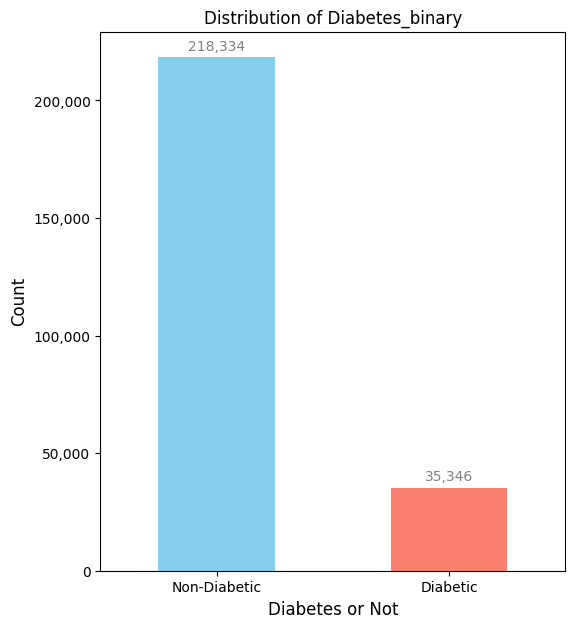

In [ ]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Plotting the distribution of the 'Diabetes_binary' column
plt.figure(figsize=(6,7))

ax = df2['Diabetes_binary'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes or Not', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, ha='center')

# Adding numbers on top of each bar
for p in ax.patches:
    number = f'{int(p.get_height()):,}'
    ax.annotate(number, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='grey', xytext=(0, 5),
                textcoords='offset points')

# Function to format the tick labels
def format_ytick_labels(x, pos):
    return "{:,.0f}".format(x)


plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ytick_labels))

plt.show()

According to the distribution of Diabetes_binary, the majority of cases fall into <b>no diabetes</b> category. A smaller but significant portion of cases belong to <b>diabetes</b> category.

#### Point to be noted:

Most of the case is concentrated in no diabetes category, so if we try to use this data as it is for classification, then the imbalance could affect the model's performance.

### Correlation of Categorical Variables


We will perform a Chi-Square test in this dataset to check whether there's a significant association between categorical variables and the target variable.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Select categorical columns to test (excluding the target initially)
categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                       'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education']

# Add the target variable to the list
categorical_columns.append('Diabetes_binary')

# Create a new DataFrame with only the categorical columns
df_categorical = df2[categorical_columns]

# Get all column names
all_columns = df_categorical.columns.values

# Create an empty DataFrame to store chi-square results
chi2_results = pd.DataFrame(index=all_columns, columns=all_columns)

# Iterate through all column pairs
for column1 in all_columns:
    for column2 in all_columns:
        if column1 != column2:
            contingency_table = pd.crosstab(df_categorical[column1], df_categorical[column2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)

            # Store chi2 statistic and p-value in the results DataFrame
            chi2_results.loc[column1, column2] = f"Chi2: {chi2:.2f}, p: {p:.3f}"
        else:
            chi2_results.loc[column1, column2] = "-"  # Mark diagonal with "-"

# Display the results DataFrame
print(chi2_results)

                                        HighBP                  HighChol  \
HighBP                                       -  Chi2: 22556.72, p: 0.000   
HighChol              Chi2: 22556.72, p: 0.000                         -   
CholCheck              Chi2: 2460.63, p: 0.000   Chi2: 1859.73, p: 0.000   
Smoker                 Chi2: 2386.06, p: 0.000   Chi2: 2114.20, p: 0.000   
Stroke                 Chi2: 4257.87, p: 0.000   Chi2: 2175.24, p: 0.000   
HeartDiseaseorAttack  Chi2: 11117.88, p: 0.000   Chi2: 8288.02, p: 0.000   
PhysActivity           Chi2: 3980.10, p: 0.000   Chi2: 1544.85, p: 0.000   
Fruits                  Chi2: 417.05, p: 0.000    Chi2: 423.34, p: 0.000   
Veggies                 Chi2: 951.88, p: 0.000    Chi2: 403.12, p: 0.000   
NoDocbcCost              Chi2: 76.31, p: 0.000     Chi2: 44.85, p: 0.000   
GenHlth               Chi2: 23417.26, p: 0.000  Chi2: 11184.25, p: 0.000   
DiffWalk              Chi2: 12684.12, p: 0.000   Chi2: 5308.70, p: 0.000   
Sex         

The results of your Chi-Square tests indicate that there is a statistically significant association between all the categorical variables tested and the target variable Diabetes_binary, given that all p-values are extremely small (close to 0 or much smaller than 0.05).

###Bar chart for Categorical Features

<Figure size 1000x1000 with 0 Axes>

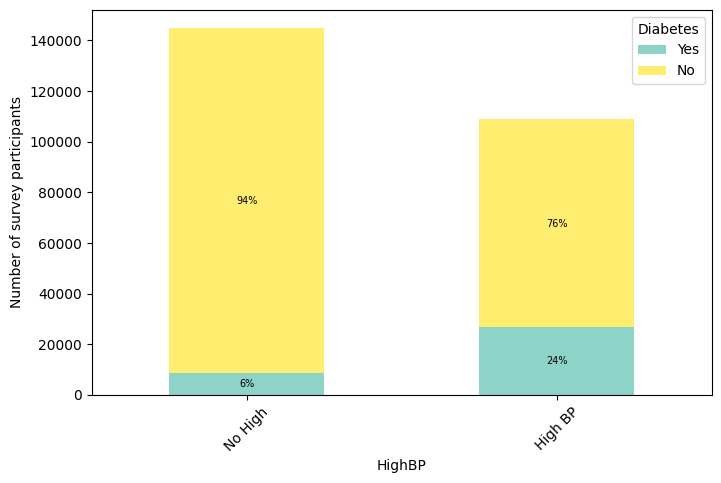

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

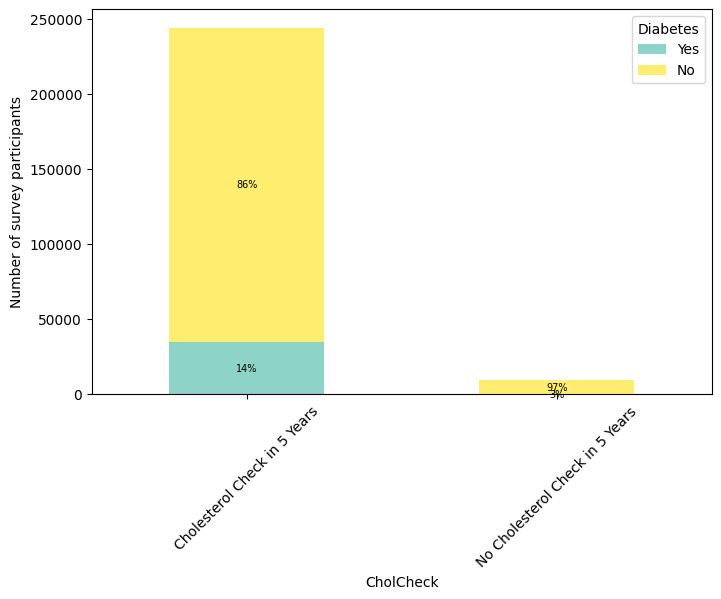

<Figure size 1000x1000 with 0 Axes>

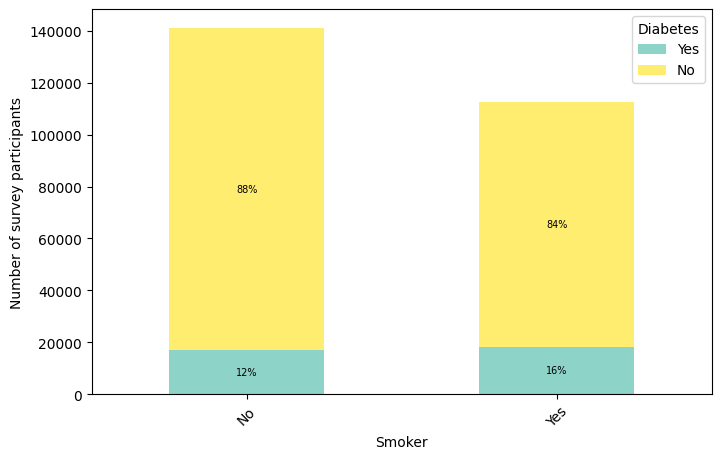

<Figure size 1000x1000 with 0 Axes>

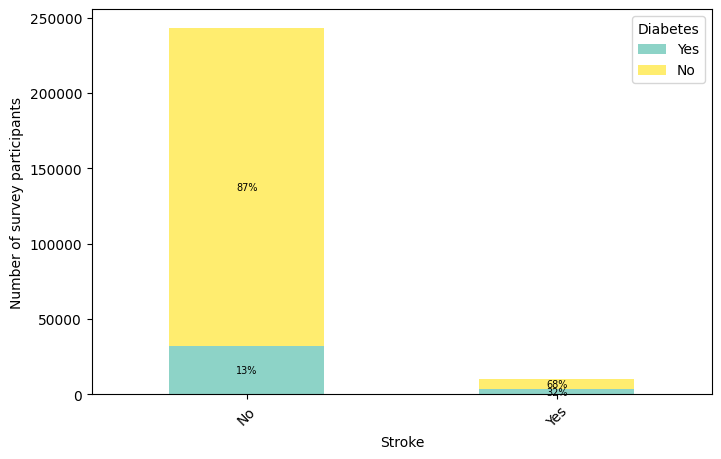

<Figure size 1000x1000 with 0 Axes>

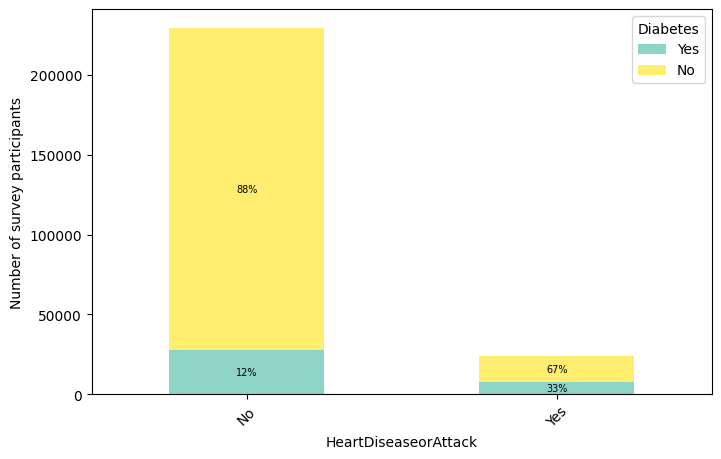

<Figure size 1000x1000 with 0 Axes>

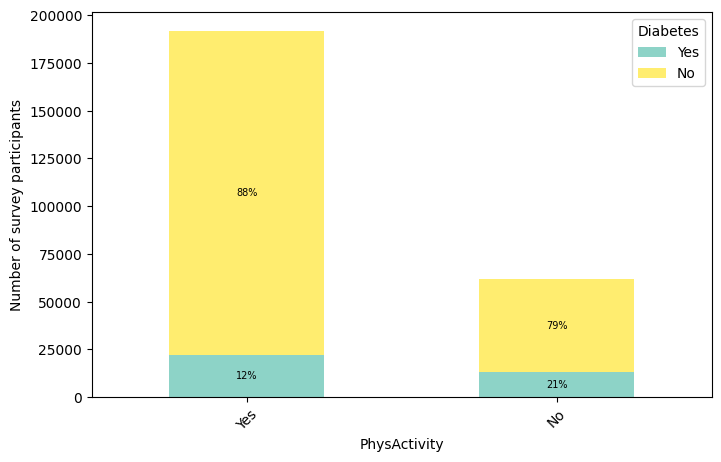

<Figure size 1000x1000 with 0 Axes>

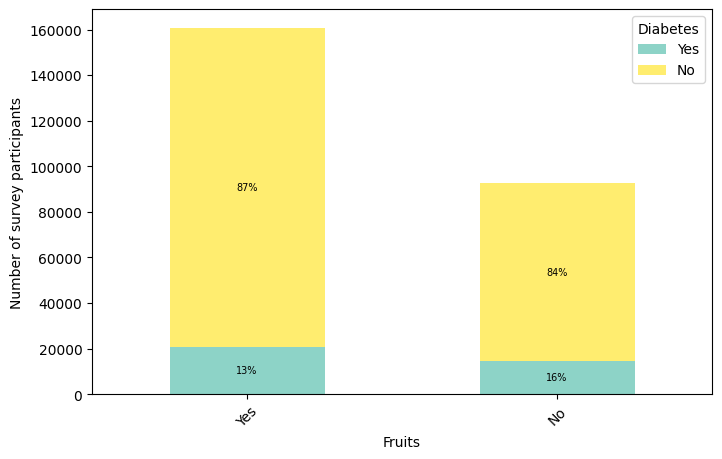

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

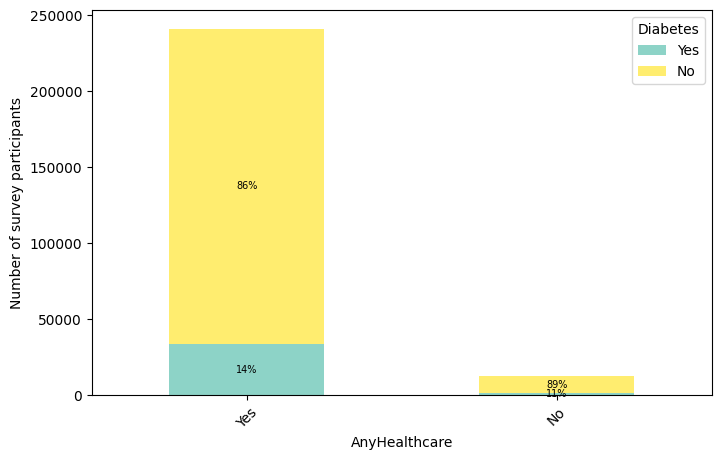

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

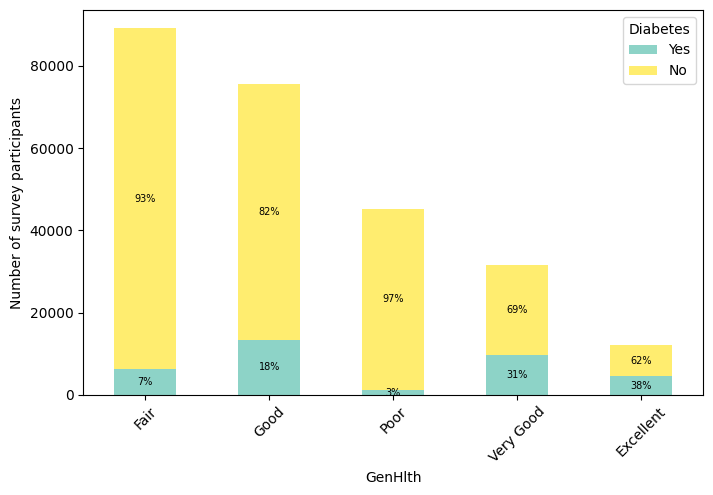

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

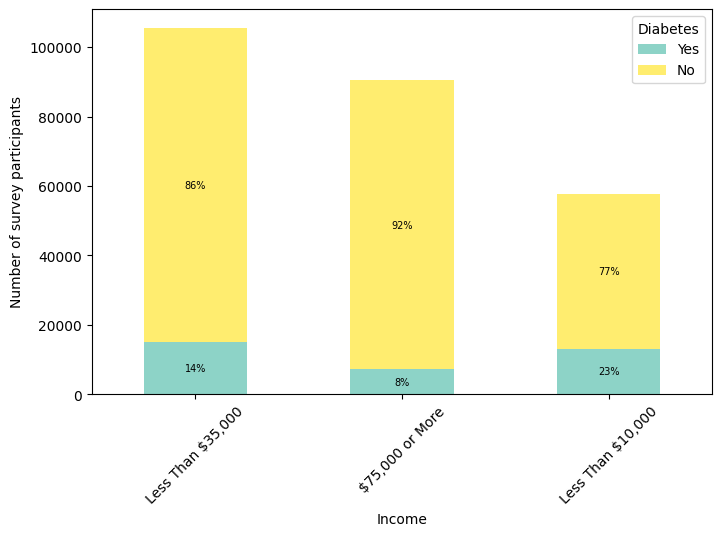

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#categorical variables by our target variable with percentages added

# Get the list of categorical columns
categorical_columns = df2.select_dtypes(include='object').columns

# Iterate over the categorical columns
for column in categorical_columns:
    # Calculate counts
    df2_grouped = df2.groupby([column, 'Diabetes_binary']).size().unstack().fillna(0)
    # Create sum of counts column and sort the values by the column
    df2_grouped['sum'] = df2_grouped.sum(axis=1)
    df2_grouped = df2_grouped.sort_values(by='sum', ascending=False).drop(columns='sum')
    # Calculate proportions
    df2_proportions = df2_grouped.div(df2_grouped.sum(axis=1), axis=0) * 100
    df2_proportions = df2_proportions.round(0).astype(int)

    # Plotting the stacked bar plot
    plt.figure(figsize=(10, 10))
    ax = df2_grouped.plot(kind='bar', stacked=True, colormap='Set3', figsize=(8, 5))

    # Annotating the bars with percentage values
    for c in ax.containers:

    # get the current segment label (a string); corresponds to column / legend
        col = c.get_label()

        # use label to get the appropriate proportion of column values from df
        # customize the label to account for cases when there are not much significant values in the column (such as below 100)
        labels = [f'{v:.0f}%' if v > 0 and d > 100 else '' for v, d in zip(df2_proportions[col], df2_grouped[col])]

        # add the annotation
        ax.bar_label(c, labels=labels, label_type='center', size=7)

    # Customize and display the plot

    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Number of survey participants')
    plt.legend(title='Diabetes', labels=['Yes', 'No'])
    plt.show()

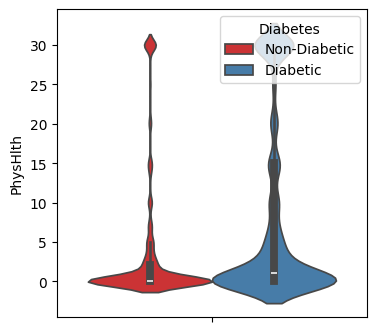

In [ ]:
#plotting some violin (similar to boxplots) to observe difference in numerical variables across diabetic and non-diabetic
def plotting_violin():
    for column in df2.select_dtypes(include=('int','float')).columns:
        plt.figure(figsize=(4, 4))
        sns.violinplot(data=df2, y=column,hue='Diabetes_binary', palette='Set1', orient='v')
        plt.legend(title='Diabetes', loc='upper right')
        plt.xticks(rotation=45)
        plt.show()

plotting_violin()

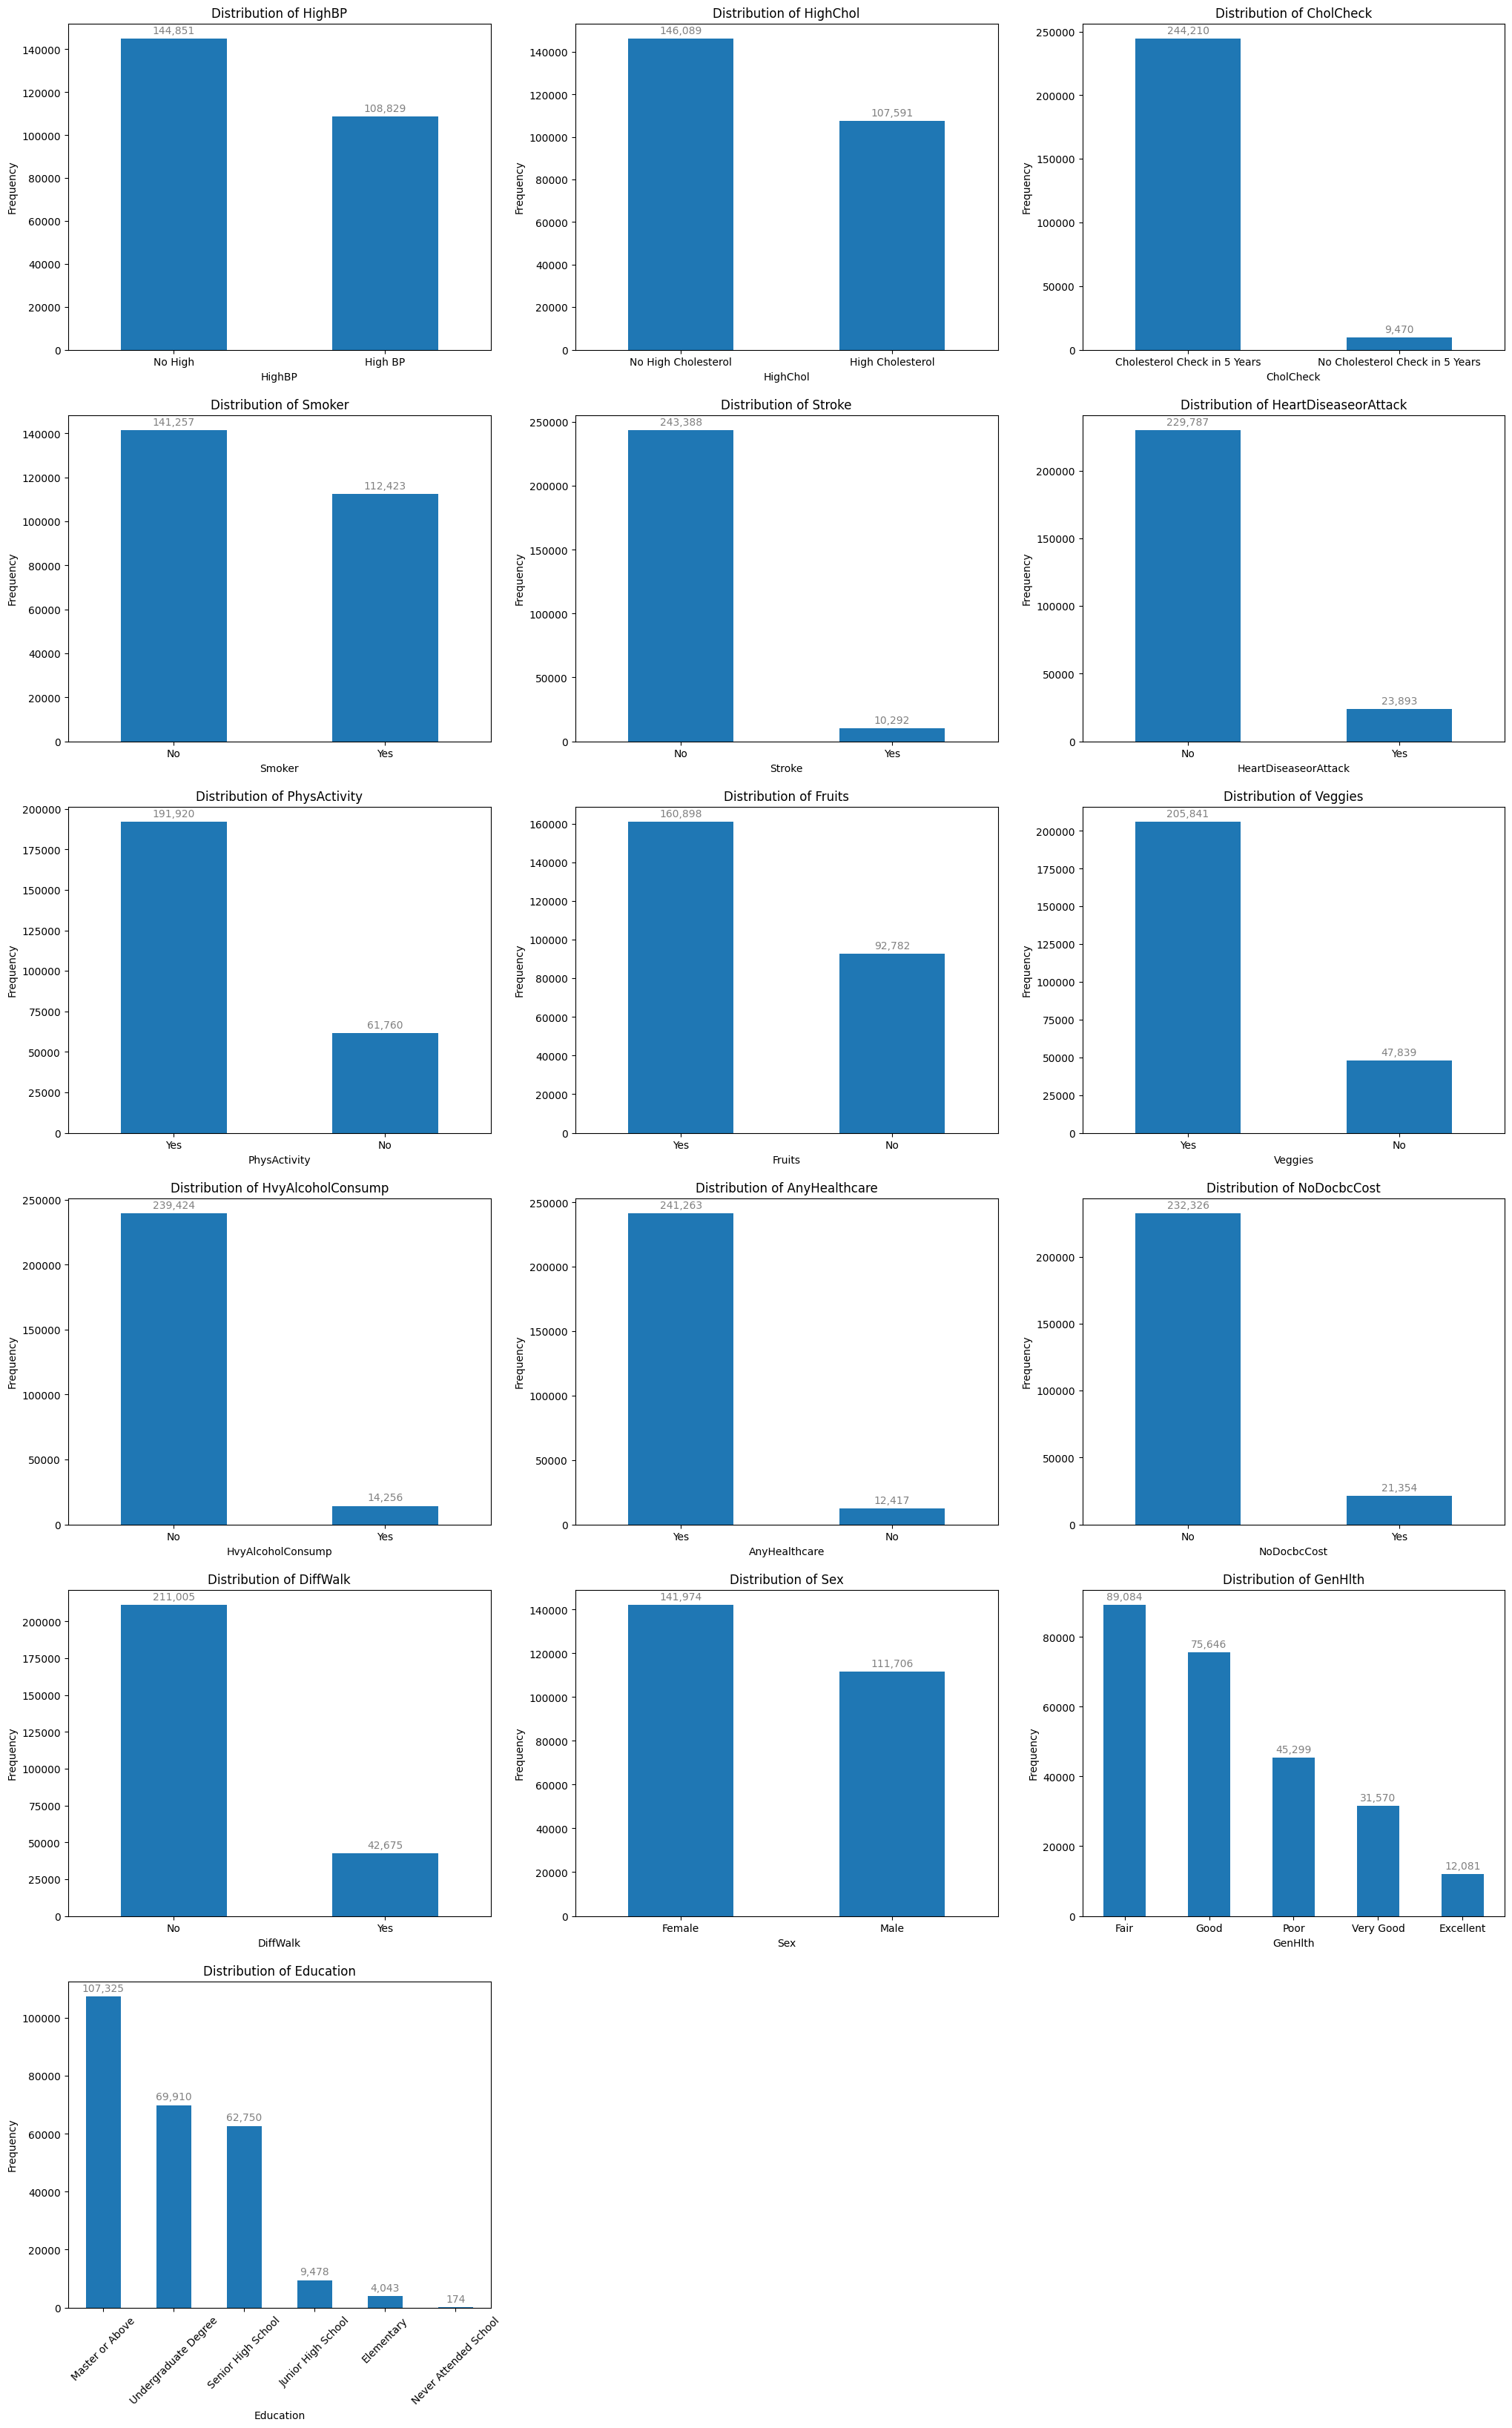

In [ ]:
import numpy as np

# Including all strongly correlated features with 'Diabetes_binary'
binary_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                  'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                  'NoDocbcCost', 'DiffWalk', 'Sex', 'GenHlth']

categorical_columns = ['Education']

all_columns = binary_columns + categorical_columns

# Calculate the number of rows and columns for the subplots
num_cols = 3  # Number of columns wanted in the grid
num_rows = int(np.ceil(len(all_columns) / num_cols))

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

def plot_bars(columns, plot_index=0, xtick_rotation=0):
    # Iterate through the binary columns and plot
    for i, col in enumerate(columns):
      ax = axes[plot_index + i]  # Get the current subplot axis

      df2[col].value_counts().plot(kind='bar', ax=ax)
      ax.set_title(f'Distribution of {col}')
      ax.set_xlabel(col)
      ax.set_ylabel("Frequency")
      ax.tick_params(axis='x', rotation=xtick_rotation)

      # Adding numbers on top of each bar
      for p in ax.patches:
          number = f'{int(p.get_height()):,}'
          ax.annotate(number, (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='grey', xytext=(0, 5),
                      textcoords='offset points')

plot_bars(binary_columns)
plot_bars(categorical_columns, plot_index = len(axes)-3, xtick_rotation=45)


# Remove empty subplots (Optional)
for i in range(len(all_columns), len(axes)):
    fig.delaxes(axes[i])

plt.show()


### Boxplots for Outlier Detection

In [ ]:
numerical_columns = ['BMI', 'PhysHlth', 'MentHlth'] # Even though 'Age' and 'Income' are normully continous data, they data collected are represented as bins.

# Plotting boxplots for these numerical features to detect outliers
df[numerical_columns].plot(kind='box', subplots=True, layout=(2, 2), figsize=(15, 12))
plt.suptitle('Boxplots for Strongly Correlated Numerical Features')
plt.show()


After detecting outliers in numerical features, we have concluded that **BMI**, **PhysHlth**, and **MentHlth** showed significant outliers.

### Histograms for Numerical Features

Added 'Age' and 'Income' to view the distributions

In [ ]:
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income']

# Create the figure and axes for subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjust layout as needed
axes = axes.flatten()  # Flatten the 2D array to 1D for easier iteration

# Plot each numerical column in a separate subplot
for ax, col in zip(axes, numerical_columns):
    df[col].hist(bins=20, ax=ax)
    ax.set_title(f'Histogram of {col}', fontsize=12)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Set the overall title
fig.suptitle('Histograms', fontsize=16)
# Remove any empty subplots if there are fewer columns than subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to not overlap with the title
plt.show()

From Histograms, we concluded that, **BMI**, **MentHlth** and **PhysHlth** were right-skewed, with many individuals reporting few health issues but some extremes.

On the other hand, for the 2 categorical data **Age** and **Income**, most individuals tend to be on the older side with substantially good income.

##Prepare for Modelling

### Dealing with Outliers (BMI, PhysHlth, MentHlth)

In [ ]:
import numpy as np
import pandas as pd

df_capped = df.copy()

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Detecting outliers for BMI
bmi_lower, bmi_upper = detect_outliers_iqr(df_capped, 'BMI')
print(f"BMI outliers below {bmi_lower} and above {bmi_upper}")

# Detecting outliers for PhysHlth
phys_lower, phys_upper = detect_outliers_iqr(df_capped, 'PhysHlth')
print(f"PhysHlth outliers above {phys_upper}")

# Detecting outliersfor MentHlth
ment_lower, ment_upper = detect_outliers_iqr(df_capped, 'MentHlth')
print(f"MentHlth outliers above {ment_upper}")

### Cap the Outliers ###
# Capping outliers for BMI
df_capped['BMI'] = np.where(df_capped['BMI'] > bmi_upper, bmi_upper, np.where(df_capped['BMI'] < bmi_lower, bmi_lower, df_capped['BMI']))

# Capping outliers for PhysHlth
df_capped['PhysHlth'] = np.where(df_capped['PhysHlth'] > phys_upper, phys_upper, np.where(df_capped['PhysHlth'] < phys_lower, phys_lower, df_capped['PhysHlth']))

# Capping outliers for MentHlth
df_capped['MentHlth'] = np.where(df_capped['MentHlth'] > ment_upper, ment_upper, np.where(df_capped['MentHlth'] < ment_lower, ment_lower, df_capped['MentHlth']))

print("\nOutliers capped at upper and lower bounds.")


BMI outliers below 13.5 and above 41.5
PhysHlth outliers above 7.5
MentHlth outliers above 5.0

Outliers capped at upper and lower bounds.


In [ ]:
## Double check for outliers
numerical_columns = ['BMI', 'PhysHlth', 'MentHlth']

# Plotting boxplots for these numerical features to detect outliers
df_capped[numerical_columns].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 12))
plt.suptitle('Boxplots for Strongly Correlated Numerical Features')
plt.show()


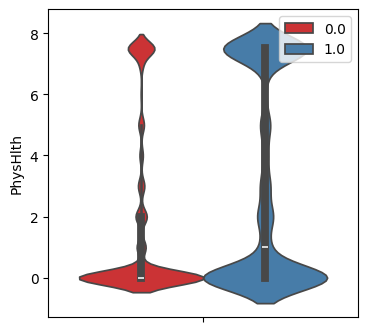

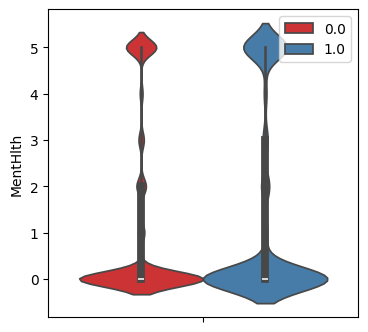

In [ ]:
#plotting some violin (similar to boxplots) to observe difference in numerical variables across diabetic and non-diabetic
def plotting_violin():
    for column in df_capped[numerical_columns].columns:
        plt.figure(figsize=(4, 4))
        sns.violinplot(data=df_capped, y=column,hue='Diabetes_binary', palette='Set1', orient='v')
        plt.legend(title='Diabetes', loc='upper right')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

plotting_violin()

###Bar Chart for Bivariate Relationships

In [ ]:
import matplotlib.pyplot as plt

cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

def create_plot_pivot(df2, x_column):
    _df_plot = df2.groupby([x_column, 'Diabetes_binary']).size() \
                  .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

fig, ax = plt.subplots(3, 4, figsize=(20, 20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df2, cols[i]).plot(kind='bar', stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.tight_layout()
plt.show()

## Dealing With Imbalanced Data

In [ ]:
# Dealing with Imbalanced Data using NearMiss
from imblearn.under_sampling import NearMiss

# Data Splitting
X = df_capped.drop("Diabetes_binary", axis=1)  # Features
Y = df_capped["Diabetes_binary"]               # Target

# Initialize NearMiss
nm = NearMiss(version=1, n_neighbors=10)

# Resample the dataset to address imbalance
X_sm, Y_sm = nm.fit_resample(X, Y)

# Check the shape of resampled data
print(f"Resampled dataset shape: {X_sm.shape}, {Y_sm.shape}")
print(Y_sm.value_counts())  # Check the distribution after resampling

Resampled dataset shape: (70692, 21), (70692,)
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


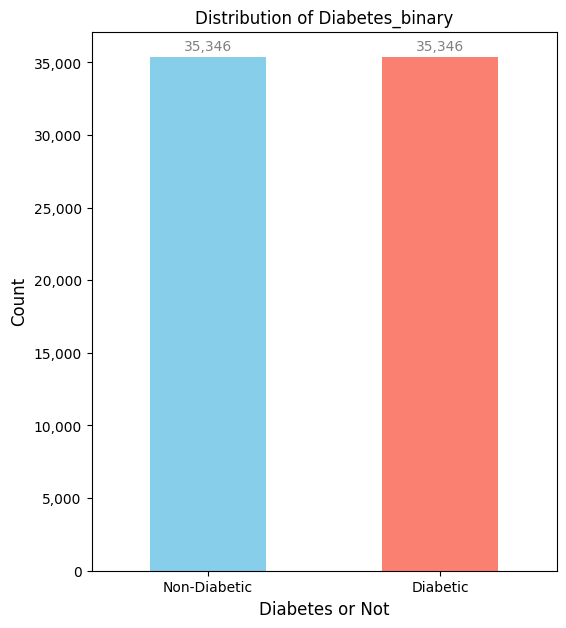

In [ ]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_resampled = pd.concat([X_sm, Y_sm], axis=1)

# Plotting the distribution of the 'Diabetes_binary' column
plt.figure(figsize=(6,7))

ax = df_resampled['Diabetes_binary'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes or Not', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, ha='center')


# Adding numbers on top of each bar
for p in ax.patches:
    number = f'{int(p.get_height()):,}'
    ax.annotate(number, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='grey', xytext=(0, 5),
                textcoords='offset points')

# Function to format the tick labels
def format_ytick_labels(x, pos):
    return "{:,.0f}".format(x)


plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ytick_labels))

plt.show()

## Feature Selection

### Feature Selection via Chi-Square

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd


X = df_resampled.drop(TARGET_COLUMN, axis=1) # Features
Y = df_resampled[TARGET_COLUMN]        # Target

# Encode categorical variables (if not already encoded)
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Perform Chi-Square test
chi2_scores, p_values = chi2(X, Y)

# Create a DataFrame for easy interpretation
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi-Square Score': chi2_scores, 'p-Value': p_values})
chi2_results.sort_values(by='p-Value', ascending=True, inplace=True)
print(chi2_results)



                 Feature  Chi-Square Score        p-Value
0                 HighBP       2485.964718   0.000000e+00
16              DiffWalk      11487.219740   0.000000e+00
15              PhysHlth     100388.366114   0.000000e+00
14              MentHlth      46409.937893   0.000000e+00
13               GenHlth       9275.758052   0.000000e+00
12           NoDocbcCost       3374.934367   0.000000e+00
19             Education       2160.691688   0.000000e+00
20                Income      12501.758556   0.000000e+00
6   HeartDiseaseorAttack       4596.957355   0.000000e+00
5                 Stroke       2799.476274   0.000000e+00
3                    BMI       8031.003827   0.000000e+00
7           PhysActivity       2138.181523   0.000000e+00
4                 Smoker       1216.006418  2.026176e-266
1               HighChol       1085.254494  5.293659e-238
8                 Fruits       1036.697700  1.895182e-227
9                Veggies        738.683755  1.158738e-162
17            

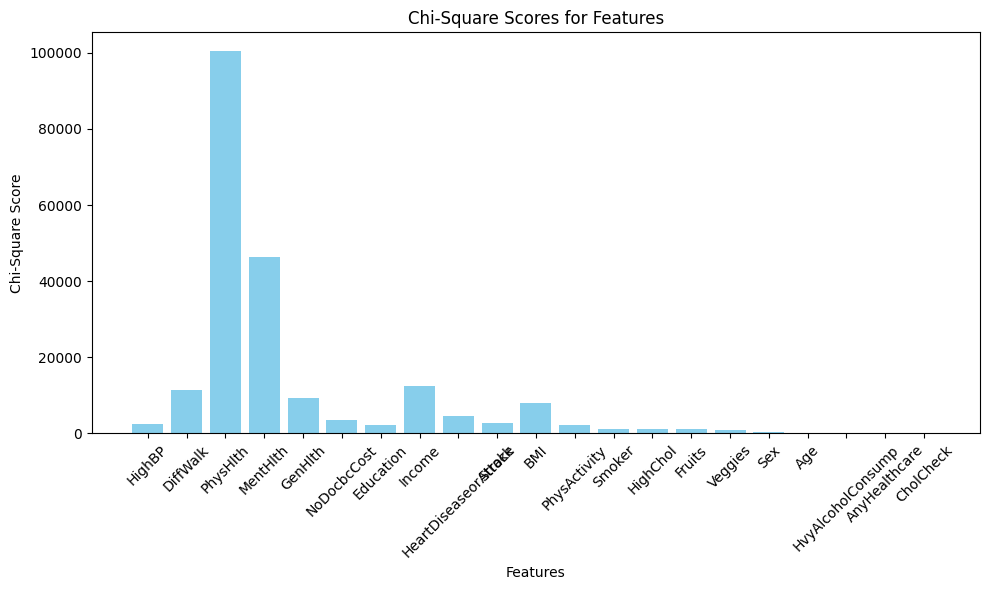

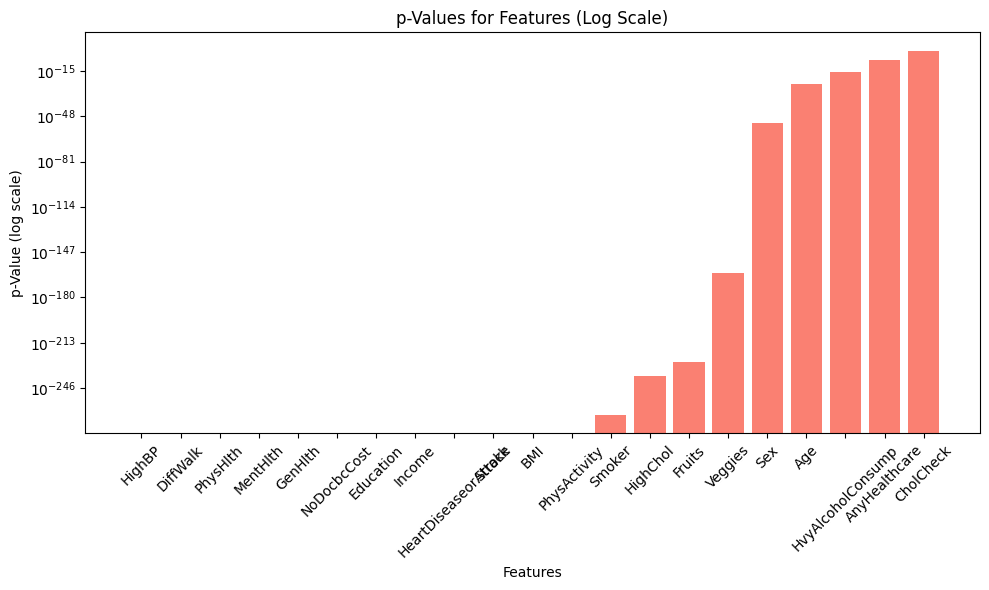

In [ ]:
# Create a bar plot for Chi-Square scores
plt.figure(figsize=(10, 6))
plt.bar(chi2_results['Feature'], chi2_results['Chi-Square Score'], color='skyblue')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel('Features')
plt.ylabel('Chi-Square Score')
plt.title('Chi-Square Scores for Features')
plt.tight_layout()
plt.show()

# Create a bar plot for p-values (using a logarithmic scale for better visualization)
plt.figure(figsize=(10, 6))
plt.bar(chi2_results['Feature'], chi2_results['p-Value'], color='salmon')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('p-Value (log scale)')
plt.yscale('log')  # Use logarithmic scale for p-values
plt.title('p-Values for Features (Log Scale)')
plt.tight_layout()
plt.show()

#### After completing chi-square analysis, here are the findings



**Chi-Square**

After evaluating the p-Value and the Chi-Square score, we select the following features for modelling:

*                 Feature | Chi-Square Score     |   p-Value
*                 HighBP   |    2485.964718 |  0.000000e+00
*              DiffWalk    |  11487.219740  | 0.000000e+00
*              PhysHlth    | 100388.366114  | 0.000000e+00
*              MentHlth    |  46409.937893  | 0.000000e+00
*               GenHlth    |   9275.758052  | 0.000000e+00
*           NoDocbcCost    |   3374.934367  | 0.000000e+00
*             Education    |   2160.691688  | 0.000000e+00
*                Income    |  12501.758556  | 0.000000e+00
*   HeartDiseaseorAttack   |    4596.957355 |  0.000000e+00
*                 Stroke   |    2799.476274 |  0.000000e+00
*                    BMI   |    8031.003827 |  0.000000e+00
*           PhysActivity   |    2138.181523 |  0.000000e+00
*                 Smoker   |    1216.006418 | 2.026176e-266
*               HighChol   |    1085.254494 | 5.293659e-238
*                 Fruits   |    1036.697700 | 1.895182e-227
*                Veggies   |     738.683755 | 1.158738e-162


In [ ]:
# Selecting relevant features for modelling
relevant_columns = ['GenHlth', 'PhysHlth', 'DiffWalk', 'MentHlth', 'BMI', 'PhysActivity', 'Education', 'Income',
                    'HighBP', 'Stroke', 'HeartDiseaseorAttack', 'NoDocbcCost', 'Smoker', 'HighChol', 'Fruits', 'Veggies']

# Create a new DataFrame with only the selected features
df_selected = df_resampled[relevant_columns + TARGET_COLUMN]

# Display the first few rows of the new DataFrame
df_selected.head()


GenHlth  PhysHlth  DiffWalk  MentHlth   BMI  PhysActivity  Education  \
0      3.0       0.0       0.0       0.0  28.0           1.0        6.0   
1      3.0       0.0       0.0       0.0  28.0           1.0        6.0   
2      2.0       0.0       0.0       0.0  27.0           1.0        6.0   
3      2.0       0.0       0.0       0.0  27.0           1.0        6.0   
4      2.0       0.0       0.0       0.0  27.0           1.0        6.0   

   Income  HighBP  Stroke  HeartDiseaseorAttack  NoDocbcCost  Smoker  \
0     8.0     1.0     0.0                   0.0          0.0     0.0   
1     8.0     1.0     0.0                   0.0          0.0     0.0   
2     8.0     1.0     0.0                   0.0          0.0     0.0   
3     8.0     1.0     0.0                   0.0          0.0     0.0   
4     8.0     1.0     0.0                   0.0          0.0     0.0   

   HighChol  Fruits  Veggies  Diabetes_binary  
0       1.0     1.0      1.0              0.0  
1       1.0     1.0      1.0              0.0  
2       1.0     1.0      1.0              0.0  
3       1.0     1.0      1.0              0.0  
4       1.0     1.0      1.0              0.0

In [ ]:
## Checking whether correlated columns should be removed to prevent multicollinearity.
## After checking both columns can be kept.

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
new_df = df_selected.copy()
variables_of_interest = new_df[['GenHlth', 'PhysHlth']]

# Add a constant term to the dataset (necessary for statsmodels)
variables_with_constant = sm.add_constant(variables_of_interest)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = variables_with_constant.columns
vif["VIF"] = [variance_inflation_factor(variables_with_constant.values, i) for i in range(variables_with_constant.shape[1])]

# Display the VIF values
print(vif)


   Variable       VIF
0     const  9.320757
1   GenHlth  1.612654
2  PhysHlth  1.612654


# Modeling

In [ ]:
# Data Splitting
X = df_selected.drop(TARGET_COLUMN, axis=1)  # Features
Y = df_selected[TARGET_COLUMN]               # Target

# Train-Test Split
from sklearn.model_selection import train_test_split

# Splitting the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Data Scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the shapes of the final datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


X_train shape: (49484, 16), X_test shape: (21208, 16)



Training Logistic Regression...

Logistic Regression:
Training set score: 0.8673
Test set score: 0.8684
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87     10601
         1.0       0.91      0.82      0.86     10607

    accuracy                           0.87     21208
   macro avg       0.87      0.87      0.87     21208
weighted avg       0.87      0.87      0.87     21208



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


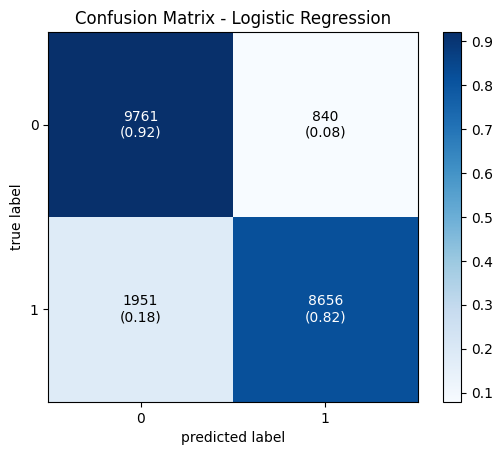

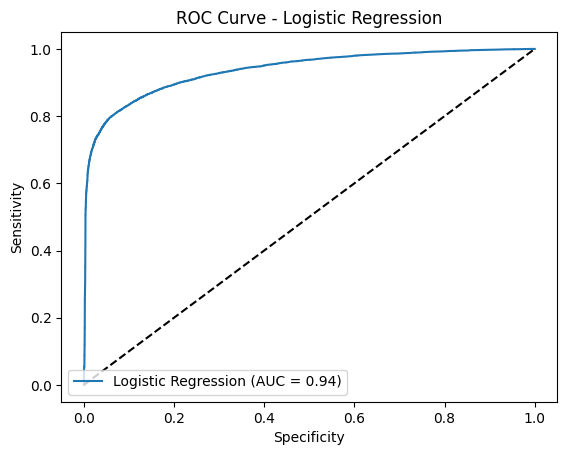


Training Decision Tree...

Decision Tree:
Training set score: 0.8858
Test set score: 0.8697
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88     10601
         1.0       0.93      0.80      0.86     10607

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208



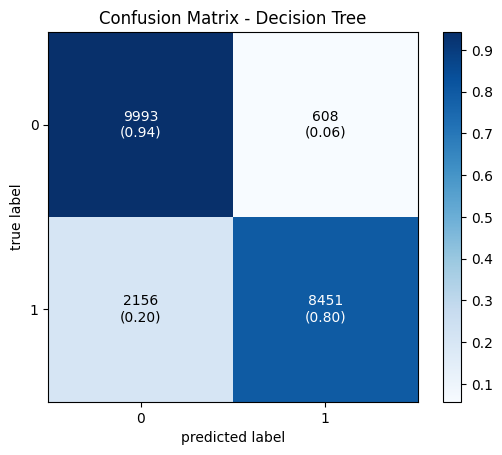

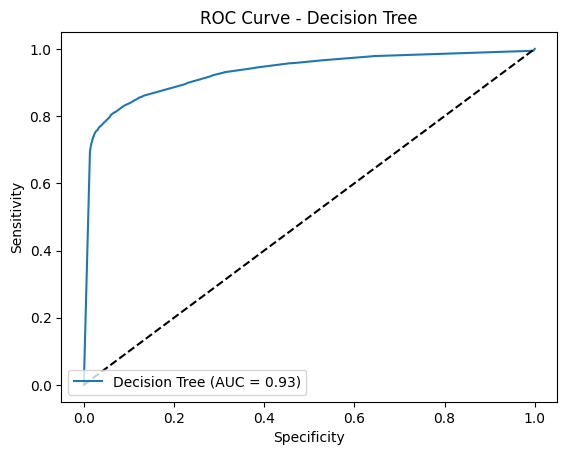


Training KNN...


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNN:
Training set score: 0.8772
Test set score: 0.8529
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.87     10601
         1.0       0.94      0.75      0.84     10607

    accuracy                           0.85     21208
   macro avg       0.87      0.85      0.85     21208
weighted avg       0.87      0.85      0.85     21208




Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest:
Training set score: 0.8890
Test set score: 0.8816
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     10601
         1.0       0.94      0.82      0.87     10607

    accuracy                           0.88     21208
   macro avg       0.89      0.88      0.88     21208
weighted avg       0.89      0.88      0.88     21208



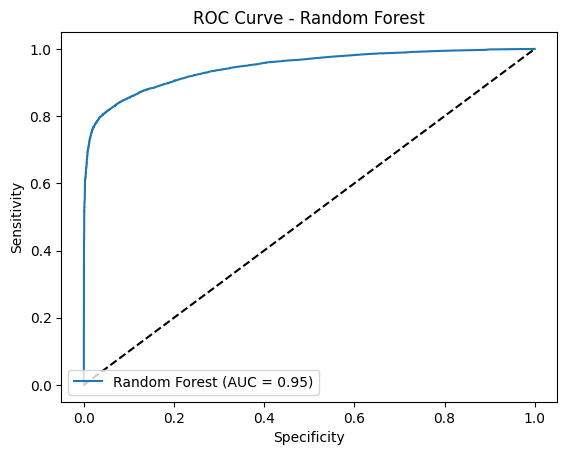


Training XGBoost...

XGBoost:
Training set score: 0.8916
Test set score: 0.8883
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     10601
         1.0       0.94      0.83      0.88     10607

    accuracy                           0.89     21208
   macro avg       0.89      0.89      0.89     21208
weighted avg       0.89      0.89      0.89     21208



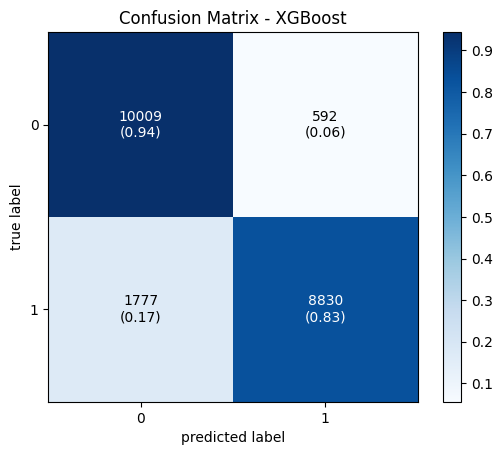

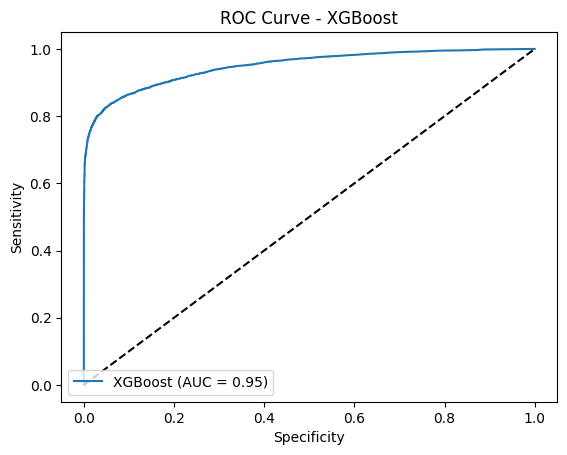

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define models and their names
models = {
    'Logistic Regression': LogisticRegression(max_iter=1500),
    'Decision Tree': DecisionTreeClassifier(max_depth=12),
    'KNN': KNeighborsClassifier(n_neighbors=6),
    'Random Forest': RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42),
    # 'SVM': SVC(kernel='rbf', C=1.0, probability=True),
    'XGBoost': XGBClassifier(eval_metric='error', learning_rate=0.1)
}

# Loop over the models
for name, model in models.items():
    print(f"\nTraining {name}...")
    # Fit the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Performance Metrics
    print(f"\n{name}:")
    print(f"Training set score: {model.score(X_train, Y_train):.4f}")
    print(f"Test set score: {model.score(X_test, Y_test):.4f}")

    # Classification report
    print(classification_report(Y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(Y_test, y_pred)
    plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True, colorbar=True)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC Curve

    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Select probabilities of class 1 (positive class)

    # Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob, sample_weight=None)

    # Calculate the ROC AUC score
    roc_score = roc_auc_score(Y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Specificity')
    plt.ylabel('Sensitivity')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc = 'lower left')
    plt.show()

From the results, all models performed reasonably well on the dataset, with accuracy scores ranging from approximately **85%** to **89%**. The most notable model is **XGBoost** achieving an accuracy of around **89%**.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:40:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.8}
Best cross-validation score for XGBoost: 0.8394
XGBoost Test Accuracy: 0.8889
Precision (Class 0): 0.8526
Precision (Class 1): 0.9336
Recall (Class 0): 0.9404
Recall (Class 1): 0.8375
F1-Score (Class 0): 0.8943
F1-Score (Class 1): 0.8829

              Metric  Value After Tuning
0      Test Accuracy            0.888910
1  Precision Class 0            0.852561
2  Precision Class 1            0.933579
3     Recall Class 0            0.940383
4     Recall Class 1            0.837466
5   F1-Score Class 0            0.894321
6   F1-Score Class 1            0.882914


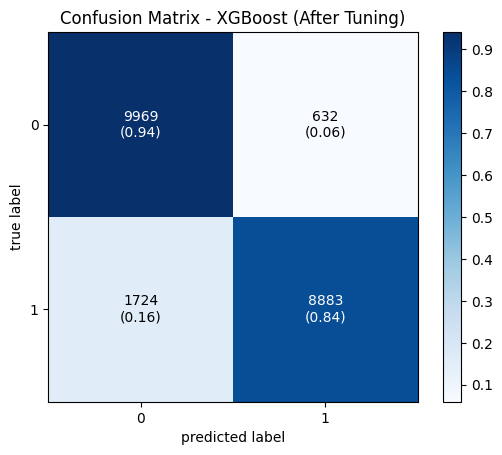

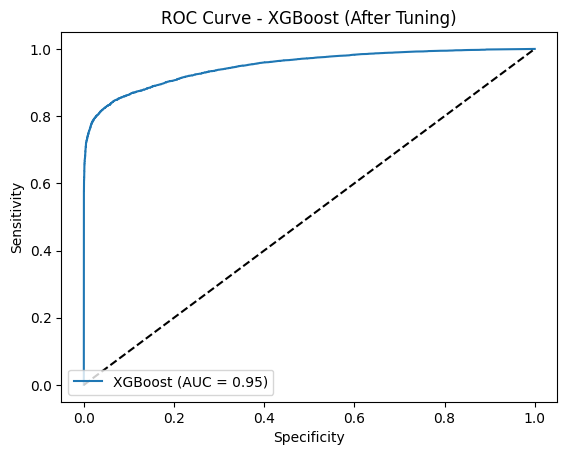

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error, roc_auc_score

### 1. XGBoost Hyperparameter Tuning ###

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid,
                                       n_iter=20, scoring='recall', cv=5, verbose=2, random_state=42, n_jobs=-1)

xgb_random_search.fit(X_train, Y_train)

# Best parameters and score
print('Best parameters for XGBoost:', xgb_random_search.best_params_)
print('Best cross-validation score for XGBoost: {:.4f}'.format(xgb_random_search.best_score_))

# Test set performance
xgb_best_model = xgb_random_search.best_estimator_
y_pred_xgb = xgb_best_model.predict(X_test)

# Test Accuracy
test_accuracy = accuracy_score(Y_test, y_pred_xgb)
print(f'XGBoost Test Accuracy: {test_accuracy:.4f}')

# Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(Y_test, y_pred_xgb, average=None)
print(f'Precision (Class 0): {precision[0]:.4f}')
print(f'Precision (Class 1): {precision[1]:.4f}')
print(f'Recall (Class 0): {recall[0]:.4f}')
print(f'Recall (Class 1): {recall[1]:.4f}')
print(f'F1-Score (Class 0): {f1[0]:.4f}')
print(f'F1-Score (Class 1): {f1[1]:.4f}')
print(f'')

# New comparison table
comparison_data = {
    'Metric': ['Test Accuracy', 'Precision Class 0', 'Precision Class 1', 'Recall Class 0', 'Recall Class 1', 'F1-Score Class 0', 'F1-Score Class 1'],
    'Value After Tuning': [test_accuracy, precision[0], precision[1], recall[0], recall[1], f1[0], f1[1]]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_xgb)
plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True, colorbar=True)
plt.title(f'Confusion Matrix - XGBoost (After Tuning)')
plt.show()

# ROC Curve

y_pred_prob = xgb_best_model.predict_proba(X_test)[:, 1]  # Select probabilities of class 1 (positive class)

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob, sample_weight=None)

# Calculate the ROC AUC score
roc_score = roc_auc_score(Y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title(f'ROC Curve - XGBoost (After Tuning)')
plt.legend(loc = 'lower left')
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best cross-validation score for Random Forest: 0.8350
Random Forest Test Accuracy: 0.8839
Precision (Class 0): 0.8487
Precision (Class 1): 0.9270
Recall (Class 0): 0.9343
Recall (Class 1): 0.8335
F1-Score (Class 0): 0.8895
F1-Score (Class 1): 0.8778


              Metric  Value After Tuning
0      Test Accuracy            0.883912
1  Precision Class 0            0.848685
2  Precision Class 1            0.927021
3     Recall Class 0            0.934346
4     Recall Class 1            0.833506
5   F1-Score Class 0            0.889458
6   F1-Score Class 1            0.877780


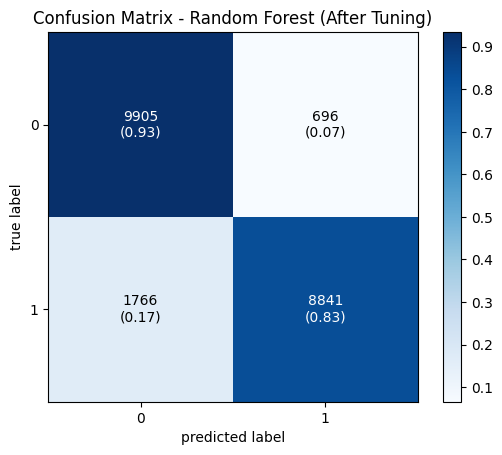

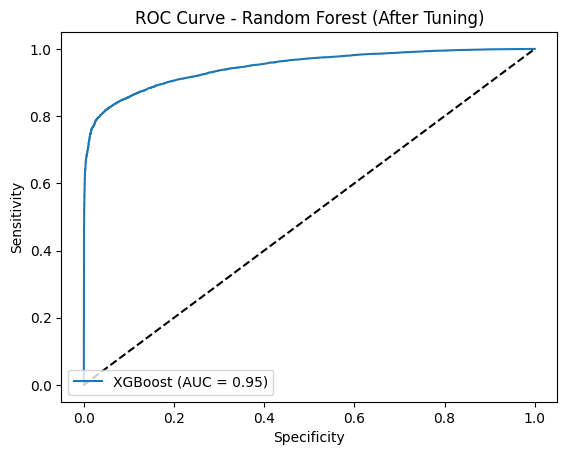

In [ ]:
### 2. Random Forest Hyperparameter Tuning ###

# Define the parameter grid for Random Forest

rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid,
                                      n_iter=20, scoring='recall', cv=5, verbose=2, random_state=42, n_jobs=-1)

rf_random_search.fit(X_train, Y_train)

# Best parameters and score
print('Best parameters for Random Forest:', rf_random_search.best_params_)
print('Best cross-validation score for Random Forest: {:.4f}'.format(rf_random_search.best_score_))

# Test set performance
rf_best_model = rf_random_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)

test_accuracy = accuracy_score(Y_test, y_pred_rf)
print(f'Random Forest Test Accuracy: {test_accuracy:.4f}')

# Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(Y_test, y_pred_rf, average=None)
print(f'Precision (Class 0): {precision[0]:.4f}')
print(f'Precision (Class 1): {precision[1]:.4f}')
print(f'Recall (Class 0): {recall[0]:.4f}')
print(f'Recall (Class 1): {recall[1]:.4f}')
print(f'F1-Score (Class 0): {f1[0]:.4f}')
print(f'F1-Score (Class 1): {f1[1]:.4f}')
print(f'\n')

# New comparison table
comparison_data = {
    'Metric': ['Test Accuracy', 'Precision Class 0', 'Precision Class 1', 'Recall Class 0', 'Recall Class 1', 'F1-Score Class 0', 'F1-Score Class 1'],
    'Value After Tuning': [test_accuracy, precision[0], precision[1], recall[0], recall[1], f1[0], f1[1]]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_rf)
plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True, colorbar=True)
plt.title(f'Confusion Matrix - Random Forest (After Tuning)')
plt.show()

# ROC Curve

y_pred_prob = rf_best_model.predict_proba(X_test)[:, 1]  # Select probabilities of class 1 (positive class)

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob, sample_weight=None)

# Calculate the ROC AUC score
roc_score = roc_auc_score(Y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title(f'ROC Curve - Random Forest (After Tuning)')
plt.legend(loc = 'lower left')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 1000}
Best cross-validation score for Logistic Regression: 0.8137
Logistic Regression Test Accuracy: 0.8684
Precision (Class 0): 0.8334
Precision (Class 1): 0.9115
Recall (Class 0): 0.9208
Recall (Class 1): 0.8161
F1-Score (Class 0): 0.8749
F1-Score (Class 1): 0.8612

              Metric  Value After Tuning
0      Test Accuracy            0.868399
1  Precision Class 0            0.833419
2  Precision Class 1            0.911542
3     Recall Class 0            0.920762
4     Recall Class 1            0.816065
5   F1-Score Class 0            0.874916
6   F1-Score Class 1            0.861165


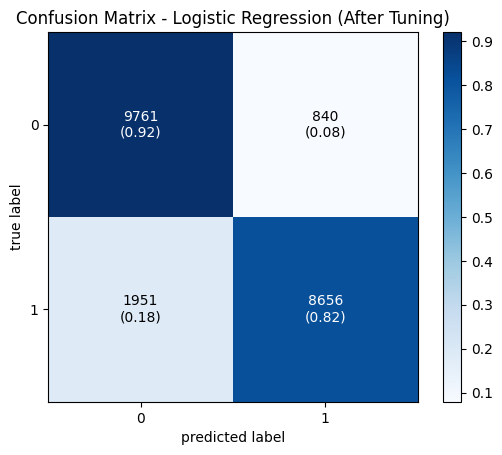

In [ ]:
### 3. Logistic Regression Hyperparameter Tuning ###

# Define the parameter grid for Logistic Regression

log_reg_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000, 1500],
}

log_reg_model = LogisticRegression(random_state=42)

# RandomizedSearchCV for Logistic Regression
log_reg_random_search = RandomizedSearchCV(estimator=log_reg_model, param_distributions=log_reg_param_grid,
                                           n_iter=20, scoring='recall', cv=5, random_state=42, n_jobs=-1)

# Fit the model to your training data (example: X_train and Y_train)
log_reg_random_search.fit(X_train, Y_train)

# Best parameters and score
print(f"Best parameters for Logistic Regression: {log_reg_random_search.best_params_}")
print(f"Best cross-validation score for Logistic Regression: {log_reg_random_search.best_score_:.4f}")

# Test set performance
log_reg_best_model = log_reg_random_search.best_estimator_
y_pred_lg = log_reg_random_search.predict(X_test)

test_accuracy = accuracy_score(Y_test, y_pred_lg)
print(f'Logistic Regression Test Accuracy: {test_accuracy:.4f}')

# Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(Y_test, y_pred_lg, average=None)
print(f'Precision (Class 0): {precision[0]:.4f}')
print(f'Precision (Class 1): {precision[1]:.4f}')
print(f'Recall (Class 0): {recall[0]:.4f}')
print(f'Recall (Class 1): {recall[1]:.4f}')
print(f'F1-Score (Class 0): {f1[0]:.4f}')
print(f'F1-Score (Class 1): {f1[1]:.4f}')
print(f'')


# New comparison table
comparison_data = {
    'Metric': ['Test Accuracy', 'Precision Class 0', 'Precision Class 1', 'Recall Class 0', 'Recall Class 1', 'F1-Score Class 0', 'F1-Score Class 1'],
    'Value After Tuning': [test_accuracy, precision[0], precision[1], recall[0], recall[1], f1[0], f1[1]]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_lg)
plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True, colorbar=True)
plt.title(f'Confusion Matrix - Logistic Regression (After Tuning)')
plt.show()

# ROC Curve

y_pred_prob = log_reg_best_model.predict_proba(X_test)[:, 1]  # Select probabilities of class 1 (positive class)

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob, sample_weight=None)

# Calculate the ROC AUC score
roc_score = roc_auc_score(Y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title(f'ROC Curve - Logistic Regression (After Tuning)')
plt.legend(loc = 'lower left')
plt.show()

In [ ]:
### Model Stacking ###
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Data Splitting and Balancing
X = df_selected.drop(TARGET_COLUMN, axis=1)
Y = df_selected[TARGET_COLUMN]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# XGBoost with best hyperparameters
# Best parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.8}
xgb_model = XGBClassifier(subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=3,
                          learning_rate=0.2, gamma=1, colsample_bytree=0.8, random_state=42)

# Random Forest with best hyperparameters
# Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=1,
                                  max_depth=20, bootstrap=True, random_state=42)

# Logistic Regression with best hyperparameters
# Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 1000}
lg_model = LogisticRegression(solver='liblinear', penalty='l2', max_iter=100, C=1000, random_state=42)

# Define the Stacking Classifier
stacking_model = StackingClassifier(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('log_reg', lg_model)],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# Train the Stacking Classifier
stacking_model.fit(X_train, Y_train)

# Make predictions and evaluate the model
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Stacking Model Test Accuracy: {accuracy:.4f}')

# Display Classification Report
print('\nClassification Report:\n', classification_report(Y_test, y_pred))

# Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(Y_test, y_pred, average=None)
roc_auc = roc_auc_score(Y_test, y_pred)
print(f'Precision (Class 0): {precision[0]:.4f}')
print(f'Precision (Class 1): {precision[1]:.4f}')
print(f'Recall (Class 0): {recall[0]:.4f}')
print(f'Recall (Class 1): {recall[1]:.4f}')
print(f'F1-Score (Class 0): {f1[0]:.4f}')
print(f'F1-Score (Class 1): {f1[1]:.4f}')
print(f'ROC score: {roc_auc:.4f}')
print(f'\n')

# New comparison table
comparison_data = {
    'Metric': ['Test Accuracy', 'Precision Class 0', 'Precision Class 1', 'Recall Class 0', 'Recall Class 1', 'F1-Score Class 0', 'F1-Score Class 1'],
    'Value After Tuning': [accuracy, precision[0], precision[1], recall[0], recall[1], f1[0], f1[1]]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, show_absolute=True, show_normed=True, colorbar=True)
plt.title(f'Confusion Matrix - Model Stacking')
plt.show()

# ROC Curve
y_pred_prob = stacking_model.predict_proba(X_test)[:, 1]  # Select probabilities of class 1 (positive class)

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob, sample_weight=None)

# Calculate the ROC AUC score
roc_score = roc_auc_score(Y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Model Stacking (AUC = {roc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title(f'ROC Curve - Model Stacking')
plt.legend(loc = 'lower left')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Stacking Model Test Accuracy: 0.8889

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.89     10601
         1.0       0.92      0.85      0.88     10607

    accuracy                           0.89     21208
   macro avg       0.89      0.89      0.89     21208
weighted avg       0.89      0.89      0.89     21208

Precision (Class 0): 0.8607
Precision (Class 1): 0.9218
Recall (Class 0): 0.9278
Recall (Class 1): 0.8499
F1-Score (Class 0): 0.8930
F1-Score (Class 1): 0.8844
ROC score: 0.8889


              Metric  Value After Tuning
0      Test Accuracy            0.888863
1  Precision Class 0            0.860693
2  Precision Class 1            0.921779
3     Recall Class 0            0.927837
4     Recall Class 1            0.849910
5   F1-Score Class 0            0.893005
6   F1-Score Class 1            0.884387


Stacking models with Logistic Regression as the final estimator performed with the same accuracy as XGBoost. However, the stacked model's Recall score (Class 1) are slightly better, which is beneficial since it is the class of interest.

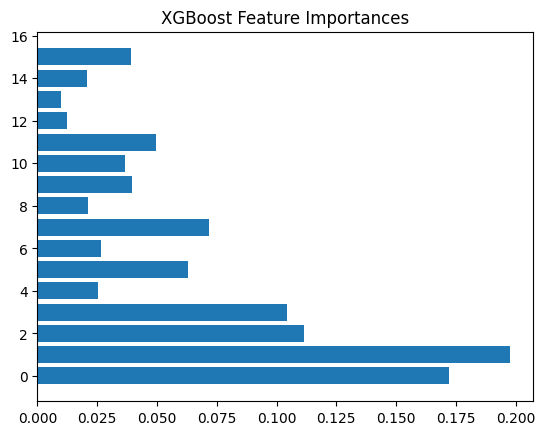

In [ ]:
# Analyze Feature Importance
xgb_best = stacking_model.named_estimators_['xgb']
importances = xgb_best.feature_importances_

# Plot feature importance (for XGBoost model: best individual performing one)
import matplotlib.pyplot as plt
plt.barh(range(len(importances)), importances)
plt.title("XGBoost Feature Importances")
plt.show()